## Image clasification without CNN
### Only using dense layers

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist


In [2]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


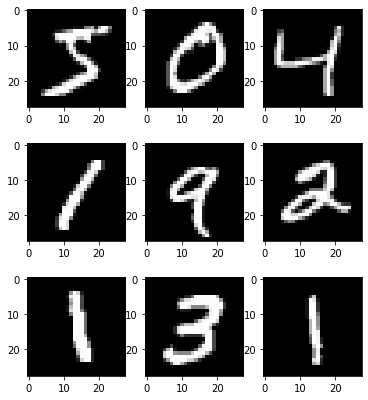

In [220]:
fig=plt.figure(figsize=(6,7))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i],cmap='gray')
plt.show()

# Loading and Pre Processing of model

In [6]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
def data_processing():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  num_pixels=X_train.shape[1]*X_train.shape[2]
  # reshape training model to sample x width x height x channel (gray scale has 1 channel )
  X_train=X_train.reshape(X_train.shape[0], num_pixels).astype('float')
  X_test=X_test.reshape(X_test.shape[0], num_pixels).astype('float')
  # scaling to convert between 1 and 0
  X_train=X_train/255
  X_test=X_test/255
  # chaning labels to one hot
  y_train=to_categorical(y_train)
  y_test=to_categorical(y_test)

  return X_train, y_train, X_test, y_test


In [7]:
X_train, y_train, X_test, y_test = data_processing()

In [8]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# Basel-line Model

In [49]:
def base_line_model():
  model=Sequential()
  model.add(Dense(units=784,input_dim=784,activation='relu'))
  
  model.add(Dense(units=10,activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

# Model Evaluation
 Actual test set is having 10 k samples.
 We will evaluate model using K-fold splits on the Training Set .This will further divide the Training set in training-test splits.
 
 Each test set will be 20% of the training dataset, or about 12,000 examples, close to the size of the actual test set for this problem.

In [59]:
def evaluate_model(Xtrain, ytrain,model ):
  # histories=[]
  # scores=[]
  scores, histories = list(), list()
  
  kfold=KFold(n_splits=3,shuffle=True,random_state=7)
  for train_index , test_index in kfold.split(Xtrain):
    X_train , y_train , X_test , y_test = Xtrain[train_index], ytrain[train_index] , Xtrain[test_index], ytrain[test_index]
    history=model.fit(x=X_train, y= y_train, batch_size=200, epochs=3, verbose='auto', callbacks=None, validation_data=(X_test , y_test))
    _ , acc=model.evaluate(x=X_test,y=y_test)
    print('accuracy={}'.format(acc * 100.0))
    histories.append(history)
    scores.append(acc)
  return histories , scores


# Running/Evaluating on Train Data

In [60]:
# run the test harness for evaluating a model
def run_test_harness():
  trainX, trainY, testX, testY = data_processing()
  model=base_line_model()
  scores , histories = evaluate_model(trainX, trainY,model)
  return histories , scores

In [61]:
 # entry point, run the test harness
scc , histt=run_test_harness()

Epoch 1/3
200/200 [==============================] - 4s 18ms/step - loss: 0.3359 - accuracy: 0.9045 - val_loss: 0.1871 - val_accuracy: 0.9470
Epoch 2/3
200/200 [==============================] - 3s 17ms/step - loss: 0.1403 - accuracy: 0.9596 - val_loss: 0.1359 - val_accuracy: 0.9607
Epoch 3/3
625/625 [==============================] - 3s 5ms/step - loss: 0.1103 - accuracy: 0.9686
accuracy=96.85999751091003
Epoch 1/3
200/200 [==============================] - 4s 19ms/step - loss: 0.0838 - accuracy: 0.9768 - val_loss: 0.0645 - val_accuracy: 0.9808
Epoch 2/3
200/200 [==============================] - 3s 17ms/step - loss: 0.0591 - accuracy: 0.9831 - val_loss: 0.0587 - val_accuracy: 0.9822
Epoch 3/3
625/625 [==============================] - 2s 3ms/step - loss: 0.0545 - accuracy: 0.9836
accuracy=98.36000204086304
Epoch 1/3
200/200 [==============================] - 4s 18ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0291 - val_accuracy: 0.9923
Epoch 2/3
200/200 [===================

In [62]:
for i in histt:
  print(i.history)

{'loss': [0.3358820676803589, 0.14028380811214447, 0.0937722772359848], 'accuracy': [0.9045249819755554, 0.9596499800682068, 0.9730499982833862], 'val_loss': [0.18711017072200775, 0.1358717828989029, 0.11031089723110199], 'val_accuracy': [0.9469500184059143, 0.9606500267982483, 0.9685999751091003]}
{'loss': [0.08375811576843262, 0.05913476645946503, 0.04091188684105873], 'accuracy': [0.9767500162124634, 0.9830999970436096, 0.9893500208854675], 'val_loss': [0.0645098015666008, 0.058669596910476685, 0.05446600168943405], 'val_accuracy': [0.9807500243186951, 0.9822499752044678, 0.9836000204086304]}
{'loss': [0.04775763303041458, 0.030078113079071045, 0.02072037197649479], 'accuracy': [0.9858499765396118, 0.9922999739646912, 0.9954500198364258], 'val_loss': [0.029117923229932785, 0.03329508379101753, 0.03584928438067436], 'val_accuracy': [0.9922999739646912, 0.9897000193595886, 0.9884999990463257]}


# Summarizing Results

In [99]:
def summarize_diagnostics(histories):
  ax,fig = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
  for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show() #working
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


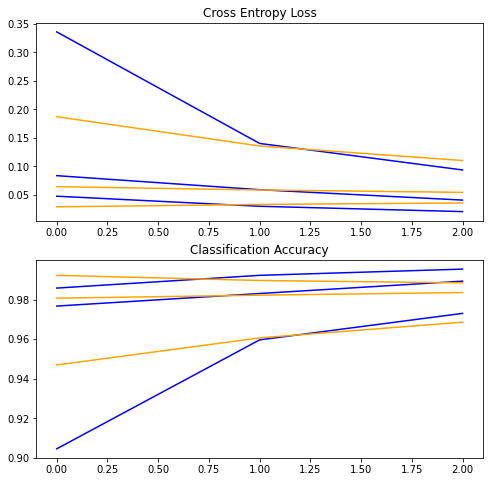

In [100]:
summarize_diagnostics(histt)

# **Summarize Model efficiency**

In [108]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

Accuracy: mean=98.023 std=0.847, n=3


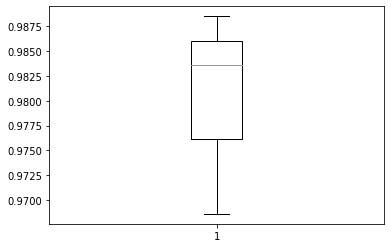

In [109]:
summarize_performance(scc)

# **Saving the Final Model**
# Steps
 

1.   **Using different model architecture are used and Kfold cross validation is done**
2.   **Best model architecture is found (in order to save time..this step is skipped in the notebook)**
2.   **The final chosen architecutr of model is trained on the Full data (without using Kfold cross validation)**


In [115]:
# we skip Step1 and step2 and jumpt to step 3 here to save time
# fit model

X_train, y_train, X_test, y_test = data_processing()
model=base_line_model()

In [116]:
# fit model
history=model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)

# **Saving Model & Training History(with acc & loss data )**

In [118]:
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 

import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# **Using Model Evalutation (only) on the Test Data**
## This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [222]:
# run the test harness for evaluating a model
# the only difference here is that we just load the previous model
def run_test_harness():
  trainX, trainY, testX, testY = data_processing()
  from keras.models import load_model
  model_path=path +'/digits_model1.h5'
  loaded_model = load_model(model_path) 
  model=loaded_model
  # we just use simple'evaluate" method on test data(not the function 'model_evaluate')
  loss, acc = model.evaluate(testX, testY)
  print('Final modal accuracy={} loss={}'.format(acc*100, loss))
  return histories , scores
histories , scores=run_test_harness()

313/313 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9821
Final modal accuracy=98.21000099182129 loss=0.0579744428396225


In [ ]:
# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Make prediction

## 1- Take few images
Taking 6 images from the test data 

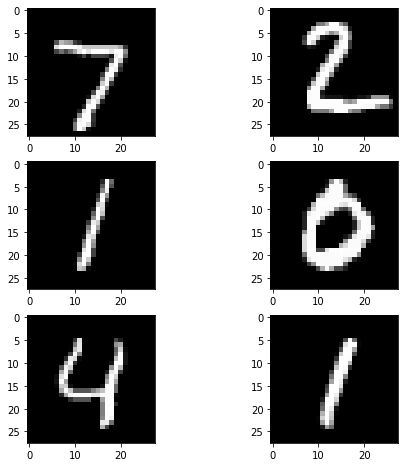

In [214]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure(figsize=(8,8))
for i in range(6):
	# define subplot
	plt.subplot(320 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 2-Load the save model

In [196]:
from keras.models import load_model 
model_path=path +'/digits_model1.h5'
loaded_model = load_model(model_path) 

# Predict on the first 5 test images.
predictions = loaded_model.predict(X_test[:6])
# Print our model's predictions.
import numpy as np
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4,1]


In [198]:
# Check our predictions against the ground truths.
print(np.argmax(y_test[:6],axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1]


# **Loading History of Accuracy and Losses of the Model**

In [215]:
history_path=path +'/history_digits_model1.json'
history= json.load(open(history_path, 'r'))

### The loaded history is in String format.Converting it back to dictionary

In [216]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

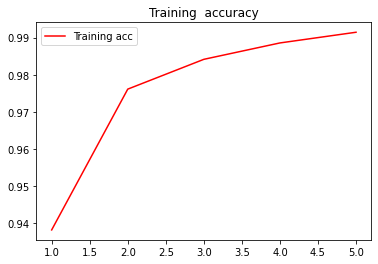

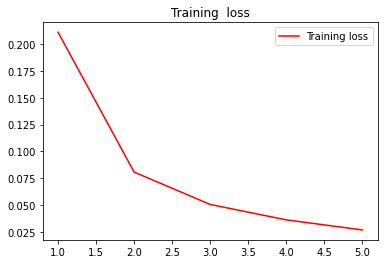

In [217]:
### .
acc = history_1['accuracy']
#acc=np.array(acc)

#val_acc=np.array(val_acc)
loss = history_1['loss']

epochs = range(1, len(acc) + 1)
acc=np.array(acc)

plt.plot(epochs, np.array(acc), 'r', label='Training acc')

plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training  loss')
plt.legend()
plt.show()